**Import statement:** `import numpy as np`

In [12]:
import numpy as np
  # import necessary library
from numpy.ma.core import argmax
  # execute this step
import pandas as pd
  # import necessary library
from matplotlib import cm
  # execute this step
import matplotlib.pyplot as plt
  # import necessary library
%matplotlib inline
  # execute this step
import seaborn as sns
  # import necessary library
#import os
import time
  # import necessary library
from sklearn.metrics import confusion_matrix, accuracy_score, auc
  # execute this step
from keras.preprocessing import sequence
  # execute this step
from keras.models import Sequential
  # create a sequential model
from keras.layers import Dense, Dropout, Activation
  # execute this step
from keras.layers import Embedding
  # execute this step
from keras.layers import Conv1D, GlobalMaxPooling1D
  # execute this step
from keras.callbacks import EarlyStopping
  # configure early stopping callback
from keras import models
  # execute this step
from keras import layers
  # execute this step
from keras.datasets import imdb
  # execute this step


Execute: `(X_train, y_train), (X_test, y_test) = imdb.load_data()`

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Training data: 
(50000,)
(50000,)
Classes: 
[0 1]
Number of words: 
88585
Review length: 
Mean 234.76 words (172.911495)


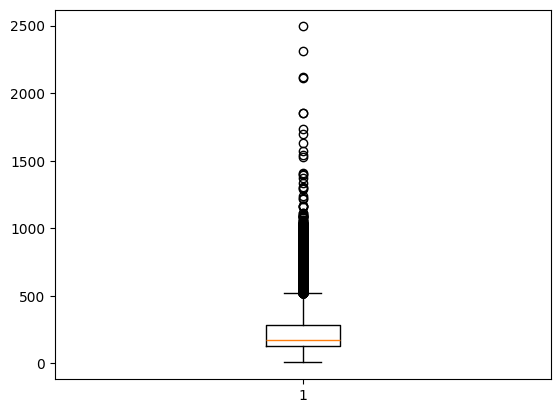

In [13]:
(X_train, y_train), (X_test, y_test) = imdb.load_data()
  # execute this step
X = np.concatenate((X_train, X_test), axis=0)
  # execute this step
y = np.concatenate((y_train, y_test), axis=0)
  # execute this step

# Exploring the Data
print("Training data: ")
  # execute this step
print(X.shape)
  # execute this step
print(y.shape)
  # execute this step
print("Classes: ")
  # execute this step
print(np.unique(y))
  # execute this step
print("Number of words: ")
  # execute this step
print(len(np.unique(np.hstack(X))))
  # execute this step
print("Review length: ")
  # execute this step
result = [len(x) for x in X]
  # execute this step
print("Mean %.2f words (%f)" % (np.mean(result), np.std(result))) # Ploting the review length
  # execute this step
plt.boxplot(result)
  # plot training history
plt.show()
  # execute this step


Execute: `def vectorize_sequences(sequences, dimension=5000): # Function for vectorising data`

In [14]:
def vectorize_sequences(sequences, dimension=5000): # Function for vectorising data
  # execute this step
    results = np.zeros((len(sequences), dimension)) # Creating an all-zero matrix of shape (len(sequences), dimension)
  # execute this step
    for i, sequence in enumerate(sequences):
  # execute this step
        results[i, sequence] = 1.  # Set specific indices of results[i] to 1s
  # execute this step
    return results  # execute this step


Execute: `# Creating Training and Testing Sets and Preprocessing them`

In [15]:
# Creating Training and Testing Sets and Preprocessing them
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=5000)
  # execute this step
# Our vectorized training data
x_train = vectorize_sequences(train_data)
  # execute this step
# Our vectorized test data
x_test = vectorize_sequences(test_data)
  # execute this step
# Our vectorized labels one-hot encoder
y_train = np.asarray(train_labels).astype('float32')
  # execute this step
y_test = np.asarray(test_labels).astype('float32')  # execute this step


Initialize a Sequential deep learning model.

In [16]:
model = models.Sequential()
  # create a sequential model
model.add(layers.Dense(32, activation='relu', input_shape=(5000,)))
  # add dense (fully connected) layer
model.add(layers.Dense(32, activation='relu',))
  # add dense (fully connected) layer
model.add(layers.Dense(1, activation='sigmoid'))
  # add dense (fully connected) layer


Execute: ``

In [17]:


#Set validation set aside
x_val = x_train[:10000]
  # execute this step
partial_x_train = x_train[10000:]
  # execute this step
y_val = y_train[:10000]
  # execute this step
partial_y_train = y_train[10000:]
  # execute this step


Configure the model with loss function and optimizer.

In [21]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
  # compile model with loss function and optimizer
start_time_m1 = time.time()
  # execute this step
history = model.fit(partial_x_train,
  # train the model
                    partial_y_train,
  # execute this step
                    epochs=40,
  # execute this step
                    batch_size=512,
  # execute this step
                    validation_data=(x_val, y_val))
  # execute this step
total_time_m1 = time.time() - start_time_m1
  # execute this step
print("The Dense Convolutional Neural Network 1 layer took %.4f seconds to train." % (total_time_m1))
  # execute this step


Epoch 1/40
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - acc: 1.0000 - loss: 0.0020 - val_acc: 0.8485 - val_loss: 1.1112
Epoch 2/40
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 1.0000 - loss: 0.0017 - val_acc: 0.8482 - val_loss: 1.1690
Epoch 3/40
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 1.0000 - loss: 9.7887e-04 - val_acc: 0.8431 - val_loss: 1.2116
Epoch 4/40
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 1.0000 - loss: 6.7911e-04 - val_acc: 0.8461 - val_loss: 1.2270
Epoch 5/40
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 1.0000 - loss: 3.8472e-04 - val_acc: 0.8477 - val_loss: 1.2423
Epoch 6/40
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 1.0000 - loss: 2.8065e-04 - val_acc: 0.8486 - val_loss: 1.2641
Epoch 7/40
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 1.0000 - loss: 2.2164e-04 - val_acc: 0.8486 - val_loss: 1.2803
Epoch 8/40
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 1.0000 - loss: 1.8322e-04 - val_acc: 0.8483 - val_loss: 1.2956
Epoch 9/40
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/st

Execute: ``

In [22]:


history_dict = history.history
  # execute this step
history_dict.keys()
  # execute this step



dict_keys(['acc', 'loss', 'val_acc', 'val_loss'])

Execute: `acc = history.history['acc']`

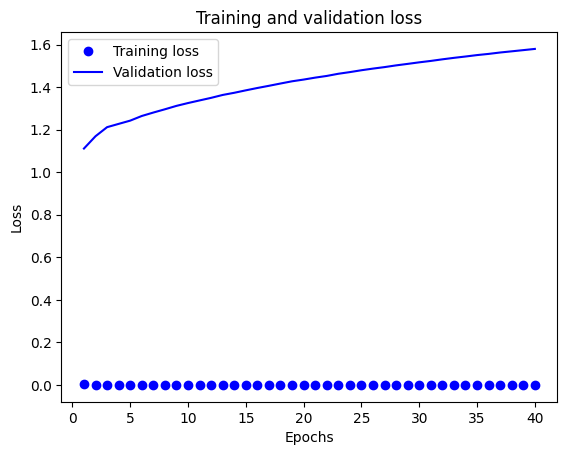

In [23]:
acc = history.history['acc']
  # execute this step
val_acc = history.history['val_acc']
  # execute this step
loss = history.history['loss']
  # execute this step
val_loss = history.history['val_loss']
  # execute this step
epochs = range(1, len(acc) + 1)
  # execute this step

# Plotting model loss
plt.plot(epochs, loss, 'bo', label='Training loss') # "bo" is for "blue dot"
  # plot training history
plt.plot(epochs, val_loss, 'b', label='Validation loss') # b is for "solid blue line"
  # plot training history
plt.title('Training and validation loss')
  # execute this step
plt.xlabel('Epochs')
  # execute this step
plt.ylabel('Loss')
  # execute this step
plt.legend()
  # execute this step
plt.show()
  # execute this step


Execute: `acc = history.history['acc']`

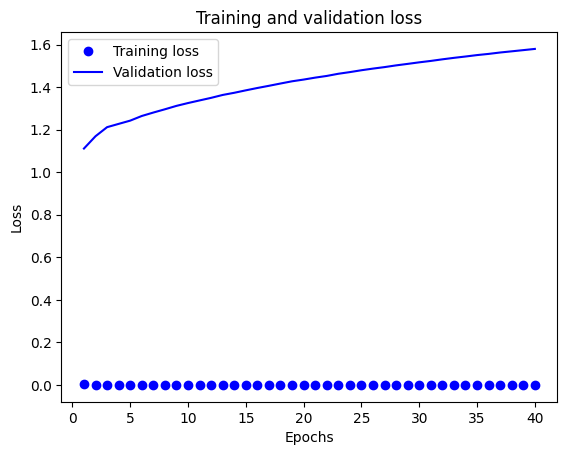

In [24]:
acc = history.history['acc']
  # execute this step
val_acc = history.history['val_acc']
  # execute this step
loss = history.history['loss']
  # execute this step
val_loss = history.history['val_loss']
  # execute this step
epochs = range(1, len(acc) + 1)
  # execute this step

# Plotting model loss
plt.plot(epochs, loss, 'bo', label='Training loss') # "bo" is for "blue dot"
  # plot training history
plt.plot(epochs, val_loss, 'b', label='Validation loss') # b is for "solid blue line"
  # plot training history
plt.title('Training and validation loss')
  # execute this step
plt.xlabel('Epochs')
  # execute this step
plt.ylabel('Loss')
  # execute this step
plt.legend()
  # execute this step
plt.show()
  # execute this step


Execute: `print(model.summary())`

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │         160,032 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 483,365 (1.84 MB)

 Trainable params: 161,121 (629.38 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 322,244 (1.23 MB)

None
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 549us/step
[[12500     0]
 [12500     0]]


Text(0.5, 23.52222222222222, 'Predicted label')

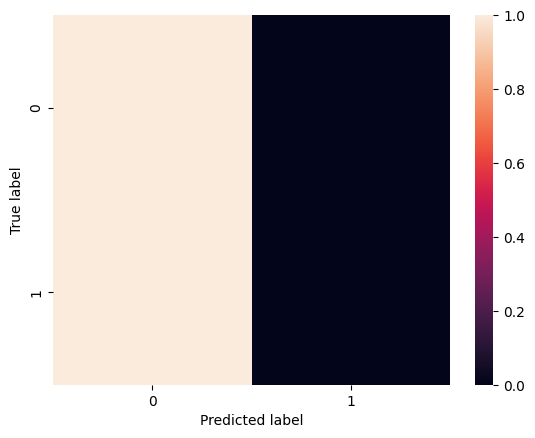

In [25]:
print(model.summary())
  # execute this step

# Predictions
pred = model.predict(x_test)
  # execute this step
classes_x=np.argmax(pred,axis=1)
  # execute this step
accuracy_score(y_test,classes_x)
  # execute this step

#Confusion Matrix
conf_mat = confusion_matrix(y_test, classes_x)
  # execute this step
print(conf_mat)
  # execute this step

conf_mat_normalized = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]
  # execute this step
sns.heatmap(conf_mat_normalized)
  # execute this step
plt.ylabel('True label')
  # execute this step
plt.xlabel('Predicted label')
  # execute this step


Execute: ``

In [26]:


#Dense with Two Layer
model2 = models.Sequential()
  # create a sequential model
model2.add(layers.Dense(32, activation='relu', input_shape=(5000,)))
  # add dense (fully connected) layer
model2.add(layers.Dense(32, activation='relu'))
  # add dense (fully connected) layer
model2.add(layers.Dense(32, activation='relu'))
  # add dense (fully connected) layer
model2.add(layers.Dense(1, activation='sigmoid'))
  # add dense (fully connected) layer


Execute: `# Compiling Model`

In [27]:
# Compiling Model
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
  # compile model with loss function and optimizer
start_time_m2 = time.time()
  # execute this step
history= model2.fit(partial_x_train,
  # train the model
                    partial_y_train,
  # execute this step
                    epochs=20,
  # execute this step
                    batch_size=512,
  # execute this step
                    validation_data=(x_val, y_val))
  # execute this step
total_time_m2 = time.time() - start_time_m2
  # execute this step
print("The Dense Convolutional Neural Network 2 layers took %.4f seconds to train." % (total_time_m2))
  # execute this step


Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - acc: 0.6567 - loss: 0.6264 - val_acc: 0.8636 - val_loss: 0.3423
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.8927 - loss: 0.2752 - val_acc: 0.8842 - val_loss: 0.2928
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.9349 - loss: 0.1823 - val_acc: 0.8766 - val_loss: 0.3187
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.9527 - loss: 0.1384 - val_acc: 0.8749 - val_loss: 0.3448
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.9659 - loss: 0.1075 - val_acc: 0.8651 - val_loss: 0.3950
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.9730 - loss: 0.0900 - val_acc: 0.8640 - val_loss: 0.4411
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.9830 - loss: 0.0616 - val_acc: 0.8608 - val_loss: 0.5163
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.9912 - loss: 0.0433 - val_acc: 0.8569 - val_loss: 0.5752
Epoch 9/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.9960 - loss:

Execute: `acc = history.history['acc']`

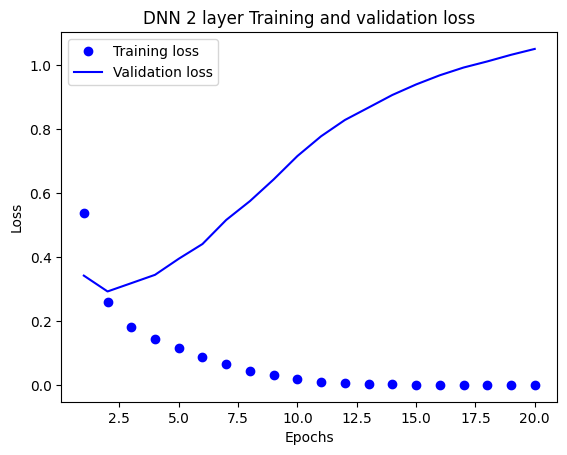

In [28]:
acc = history.history['acc']
  # execute this step
val_acc = history.history['val_acc']
  # execute this step
loss = history.history['loss']
  # execute this step
val_loss = history.history['val_loss']
  # execute this step
epochs = range(1, len(acc) + 1)
  # execute this step

# Plotting Loss
plt.plot(epochs, loss, 'bo', label='Training loss') # "bo" is for "blue dot"
  # plot training history
plt.plot(epochs, val_loss, 'b', label='Validation loss') # b is for "solid blue line"
  # plot training history
plt.title('DNN 2 layer Training and validation loss')
  # execute this step
plt.xlabel('Epochs')
  # execute this step
plt.ylabel('Loss')
  # execute this step
plt.legend()
  # execute this step
plt.show()
  # execute this step


Execute: `plt.clf()   # clear figure`

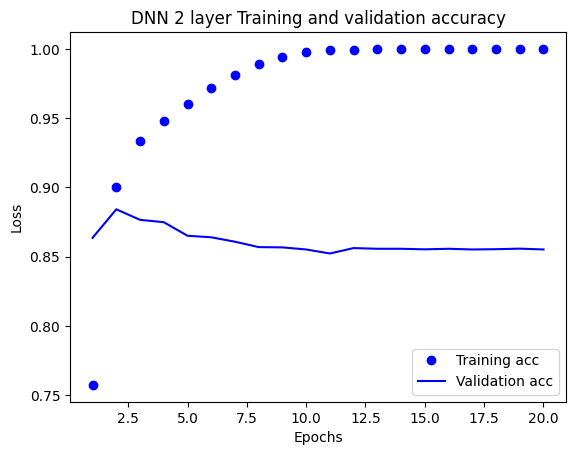

In [29]:
plt.clf()   # clear figure
  # execute this step
acc_values = history_dict['acc']
  # execute this step
val_acc_values = history_dict['val_acc']
  # execute this step
# Plotting Accuracy
plt.plot(epochs, acc, 'bo', label='Training acc')
  # plot training history
plt.plot(epochs, val_acc, 'b', label='Validation acc')
  # plot training history
plt.title('DNN 2 layer Training and validation accuracy')
  # execute this step
plt.xlabel('Epochs')
  # execute this step
plt.ylabel('Loss')
  # execute this step
plt.legend()
  # execute this step
plt.show()  # execute this step


Execute: ``

In [30]:


print(model2.summary())
  # execute this step
# Predictions
pred = model2.predict(x_test)
  # execute this step
classes_x=np.argmax(pred,axis=-1)
  # execute this step
accuracy_score(y_test,classes_x)
  # execute this step


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 32)                  │         160,032 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 486,533 (1.86 MB)

 Trainable params: 162,177 (633.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 324,356 (1.24 MB)

None
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 619us/step


0.5